# TASK 2 - Data Analysis from Excel data - 6 & 7

In [180]:
import pymysql
import pandas as pd
import numpy as np
from google.cloud.sql.connector import Connector
import sqlalchemy
import datetime
import xlrd
from dateutil.relativedelta import relativedelta

df = pd.read_excel("C:/Users/vidus/Downloads/nifty_data.xlsx",dtype={'report_date':str}) 

df.drop_duplicates()

df['dates'] = pd.to_datetime(df['report_date'])

In [187]:
date = pd.to_datetime(df['report_date'].min())
latest_date = pd.to_datetime(df['report_date'].max())
dates_present = pd.to_datetime(df['dates'].unique())
while date <= latest_date:
    if date not in dates_present:
        print("Missing Month data : ", date)
    date = date + pd.DateOffset(months=1)
#     print(date)
len(dates_present)

Missing Month data :  2010-07-01 00:00:00
Missing Month data :  2010-09-01 00:00:00
Missing Month data :  2012-09-01 00:00:00
Missing Month data :  2014-09-01 00:00:00
Missing Month data :  2017-01-01 00:00:00


136

### Calculate Simple moving average for Equity Capital of Tickers over past 6 months window. Window size should be adjustable. 


In [196]:
import matplotlib.pyplot as plt

symbols = df.Symbol.unique()
plt.style.use('default')
%matplotlib inline
def rollingAvg(symbol,window=6):
    df_ra = df[(df.Symbol == symbol)].sort_values('report_date', ascending=True).set_index('dates')
    df_ra.loc[:,'moving_avg'] = df_ra['Equity Capital (In Rs.)'].rolling(window).mean()    
    # plotting Close price and simple
    # moving average of 30 days using .plot() method
    df_ra[['Equity Capital (In Rs.)', 'moving_avg']].plot(title= symbol + ' - Moving Avg : Window =' +str(window) , label=symbol, 
                                      figsize=(16, 8))
    return df_ra

,Symbol,Name,Industry,Equity Capital (In Rs.),Free Float Market Capitalisation (Rs. Crores),Weightage (),Beta,R2,Volatility_Per,Monthly Return,Avg_Impact_Cost_percent,report_date,moving_avg
dates,,,,,,,,,,,,,
2008-01-01,TATASTEEL,Steel & Steel Products,NaN,7307674270,53974.00,1.82,1.10,0.50,3.48,-21.04,0.14,2008-01-01 00:00:00,NaN
2008-02-01,TATASTEEL,Steel & Steel Products,NaN,7307674270,58589.00,1.94,1.11,0.52,3.13,8.55,0.09,2008-02-01 00:00:00,NaN
2008-03-01,TATASTEEL,Steel & Steel Products,NaN,7307674270,50741.00,1.78,1.15,0.52,5.27,-13.4,0.08,2008-03-01 00:00:00,NaN
2008-04-01,TATASTEEL,Steel & Steel Products,NaN,7307674270,59795.00,1.92,1.13,0.50,2.96,17.84,0.07,2008-04-01 00:00:00,NaN
2008-05-01,TATASTEEL,Steel & Steel Products,NaN,7307674270,65974.00,2.25,1.11,0.50,1.93,10.33,0.06,2008-05-01 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-01,TATASTEEL,Tata Steel Ltd.,STEEL AND STEEL PRODUCTS,11266144590,36858.43,0.77,1.26,0.27,2.47,-12.37,0.03,2019-05-01 00:00:00,1.126613e+10
2019-06-01,TATASTEEL,Tata Steel Ltd.,STEEL AND STEEL PRODUCTS,11264895180,38069.49,0.79,1.29,0.28,2.24,3.3,0.02,2019-06-01 00:00:00,1.126592e+10
2019-07-01,TATASTEEL,Tata Steel Ltd.,STEEL AND STEEL PRODUCTS,11264895180,32608.89,0.72,1.26,0.28,2.11,-14.34,0.02,2019-07-01 00:00:00,1.126572e+10


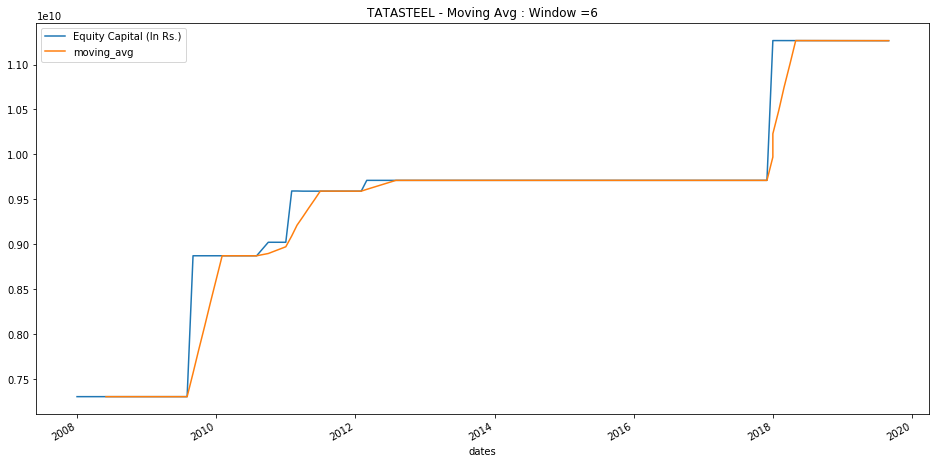

In [197]:
rollingAvg('TATASTEEL')

### Calculate year wise high and low Equity Capital for each stock. Have added SQL script as well as solved with data frames.


In [198]:
df_min_max=df.groupby(["Symbol","report_date"])['Equity Capital (In Rs.)'].describe()

In [199]:
df_min_max

count         mean  std          min          25%  \
Symbol report_date                                                              
ABB    2008-01-01 00:00:00    1.0  423816750.0  NaN  423816750.0  423816750.0   
       2008-02-01 00:00:00    1.0  423816750.0  NaN  423816750.0  423816750.0   
       2008-03-01 00:00:00    1.0  423816750.0  NaN  423816750.0  423816750.0   
       2008-04-01 00:00:00    1.0  423816750.0  NaN  423816750.0  423816750.0   
       2008-05-01 00:00:00    1.0  423816750.0  NaN  423816750.0  423816750.0   
...                           ...          ...  ...          ...          ...   
ZEEL   2019-05-01 00:00:00    1.0  960466500.0  NaN  960466500.0  960466500.0   
       2019-06-01 00:00:00    1.0  960481765.0  NaN  960481765.0  960481765.0   
       2019-07-01 00:00:00    1.0  960481765.0  NaN  960481765.0  960481765.0   
       2019-08-01 00:00:00    1.0  960481765.0  NaN  960481765.0  960481765.0   
       2019-09-01 00:00:00    1.0  960481765.0  NaN  960481765.0  960481765.0   

                                    50%          75%          max  
Symbol report_date                                                 
ABB    2008-01-01 00:00:00  423816750.0  423816750.0  423816750.0  
       2008-02-01 00:00:00  423816750.0  423816750.0  423816750.0  
       2008-03-01 00:00:00  423816750.0  423816750.0  423816750.0  
       2008-04-01 00:00:00  423816750.0  423816750.0  423816750.0  
       2008-05-01 00:00:00  423816750.0  423816750.0  423816750.0  
...                                 ...          ...          ...  
ZEEL   2019-05-01 00:00:00  960466500.0  960466500.0  960466500.0  
       2019-06-01 00:00:00  960481765.0  960481765.0  960481765.0  
       2019-07-01 00:00:00  960481765.0  960481765.0  960481765.0  
       2019-08-01 00:00:00  960481765.0  960481765.0  960481765.0  
       2019-09-01 00:00:00  960481765.0  960481765.0  960481765.0  

[6800 rows x 8 columns]